In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import pandas

# Useful Bar Plot with matplotlib and seaborn

In [3]:
# data preparation

df = pd.DataFrame()

df['x'] = np.random.normal(100, 3, 300)
df['y'] = np.random.normal(10, 1, 300)
df['z'] = np.random.choice(['A', 'B', 'C'], 300)
df['w'] = np.random.randint(1,5, size=300)
df['c'] = np.random.choice(['big', 'small', 'medium'], 300)


print(df.info())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
x    300 non-null float64
y    300 non-null float64
z    300 non-null object
w    300 non-null int64
c    300 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB
None

                x           y           w
count  300.000000  300.000000  300.000000
mean   100.124462   10.007367    2.543333
std      3.126861    0.993989    1.079509
min     91.902566    7.044370    1.000000
25%     97.856875    9.344655    2.000000
50%     99.989572    9.972259    2.000000
75%    102.264708   10.597004    4.000000
max    107.585194   12.554078    4.000000


## 1. Basic Distribution Histogram

#### Rug: bottom bins representing density, like PWM wave
#### kde_kws: Kernel density estimate, 'lw', line width
#### hist_kws: Histogram arguments: 'alpha', transparency
#### spines.set_visible: delete boundary

/Users/tongshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


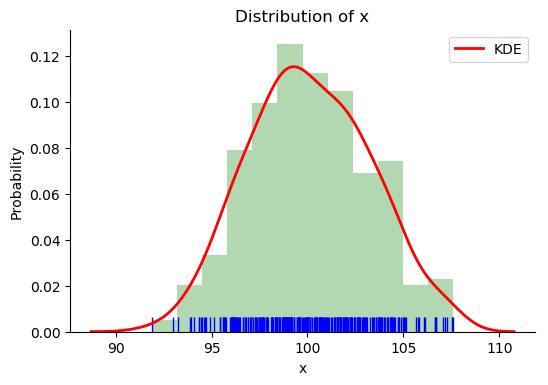

In [4]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.distplot(df['x'], rug=True, rug_kws={"color": "b"},
                   kde_kws={"color": "r", "lw": 2, "label": "KDE"},
                   hist_kws={"histtype": "barstacked", "linewidth": 3,
                             "alpha": 0.3, "color": "g"}, vertical=False)

ax.set(xlabel='x', ylabel='Probability', title='Distribution of x')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)


/Users/tongshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


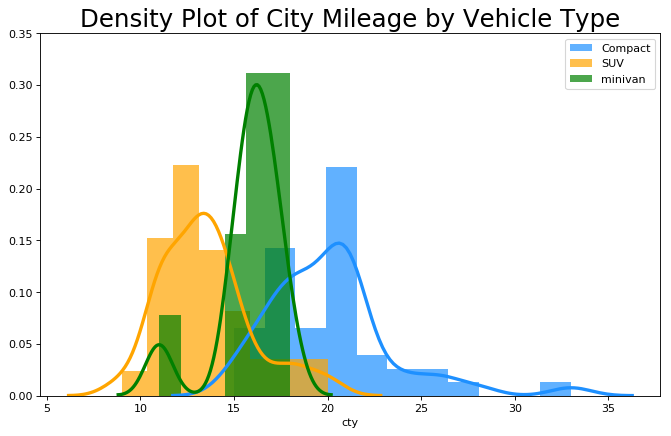

In [5]:
# Import Data
df = pd.read_csv("data/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(10,6), dpi=80)
sns.distplot(df.loc[df['class'] == 'compact', "cty"], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', "cty"], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', "cty"], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

## 2. Barplot for categorical data

/Users/tongshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


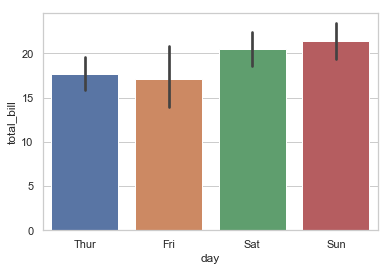

In [6]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

### Remove the std line on the top

/Users/tongshen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


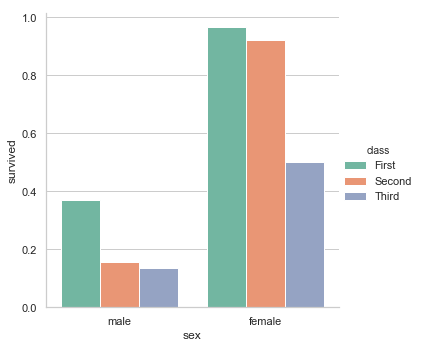

In [7]:
# Ci to remove std line
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", palette="Set2", data=titanic, ci=False)

### Put text on each bar

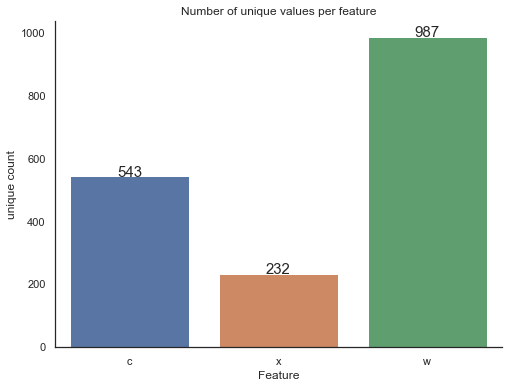

In [8]:
sns.set(style="white")
plt.figure(figsize=(8,6))
cols = ['c','x', 'w']
data = [543, 232, 987]
ax = sns.barplot(cols, data)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, data):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            uniq,
            ha="center", fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)

### More options: colors, plot type, order...

Seaborn provides very convenient [color palette](https://seaborn.pydata.org/tutorial/color_palettes.html).   
basically, one can just select one palette for one plot. Works just fine.   
Here are some examples for palette:   

### Circular color system
When you have an arbitrary number of categories to distinguish without emphasizing any one, the easiest approach is to draw evenly-spaced colors in a circular color space 

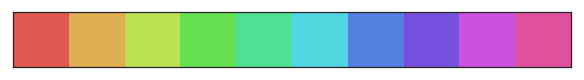

In [9]:
# circular color systems
# Color with different 'l' lightness and 's' saturation

sns.palplot(sns.hls_palette(10, l=.6, s=.7))

### categorical Color Brewer palettes


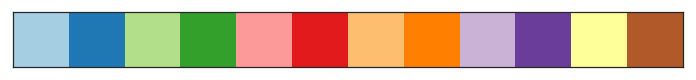

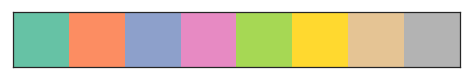

In [10]:
sns.palplot(sns.color_palette("Paired"))
sns.palplot(sns.color_palette("Set2"))

### Customized color

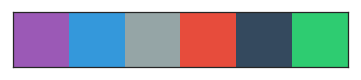

In [11]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

### Sequential single color palettes

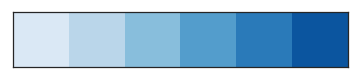

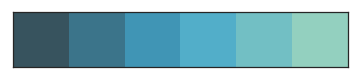

In [12]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("GnBu_d"))

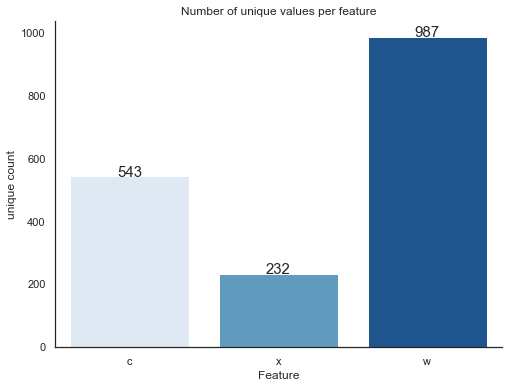

In [13]:
### Access single color in a palettes
sns.set(style="white")
plt.figure(figsize=(8,6))
cols = ['c','x', 'w']
data = [543, 232, 987]
colors = [sns.color_palette("Blues")[0], sns.color_palette("Blues")[3], sns.color_palette("Blues")[5]]
ax = sns.barplot(cols, data, palette=colors)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, data):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            uniq,
            ha="center", fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)

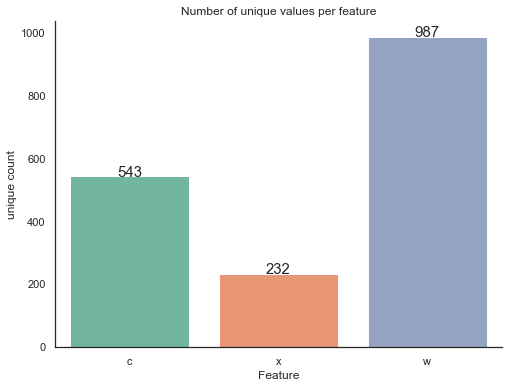

In [14]:
# Simply apply one palette

sns.set(style="white")
plt.figure(figsize=(8,6))
cols = ['c','x', 'w']
data = [543, 232, 987]

ax = sns.barplot(cols, data, palette=sns.color_palette("Set2"))
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, data):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            uniq,
            ha="center", fontsize=15)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)

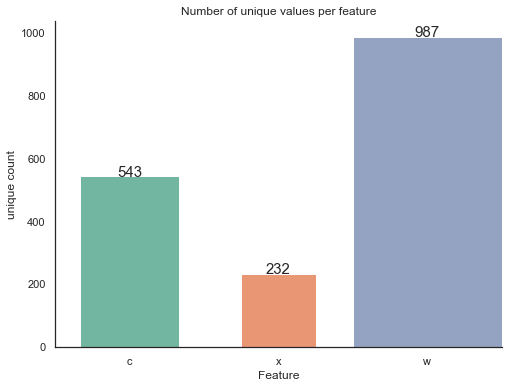

In [24]:
## Alter width of each bar

sns.set(style="white")
plt.figure(figsize=(8,6))
cols = ['c','x', 'w']
data = [543, 232, 987]
widths = [2/3, 1/2, 1] # ratio to original width
ax = sns.barplot(cols, data, palette=sns.color_palette("Set2"))
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq, ww in zip(ax.patches, data, widths):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            uniq,
            ha="center", fontsize=15)
    
    x = p.get_x()
    width = p.get_width()
    centre = x+width/2.

    p.set_x(centre-ww/2.)
    p.set_width(ww)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_visible(False)

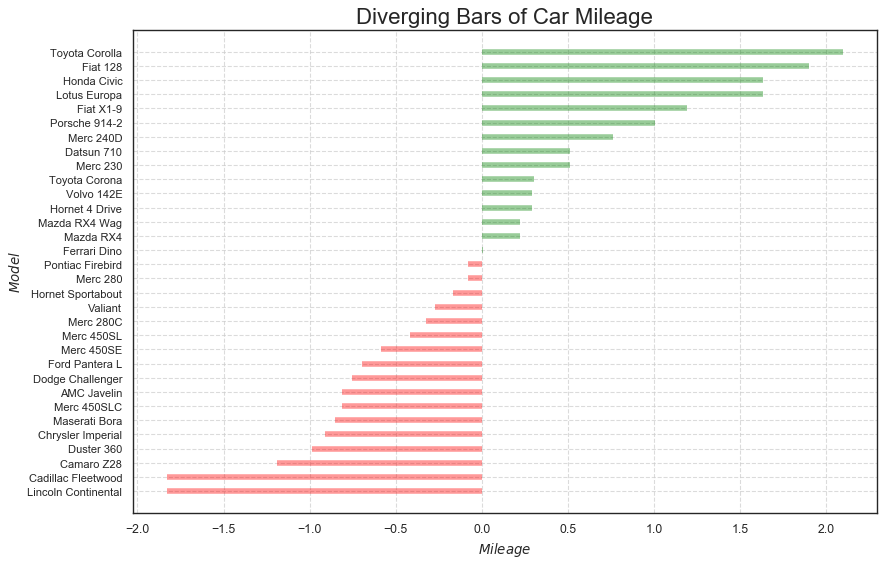

In [83]:
df = pd.read_csv("data/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(12,8), dpi= 80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=10)
plt.title('Diverging Bars of Car Mileage', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.7)
plt.show()